# Greatest Songs of All Time
Rolling Stone is an American monthly magazine that focuses on popular culture. It was founded in San Francisco, California, in 1967 by Jann Wenner, and the music critic Ralph J. Gleason. And here are their top 500 picks as the greatest songs of all time:

The dataset includes 500 song with attributes such as title, description, artist, etc. I'll start by importing/loading the required libraries as follows:

In [2]:
# Loading all the required libraries:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px

Reading the dataset and viewing top five rows:

In [3]:
df = pd.read_csv('Top 500 Songs.csv')
df.head()

,title,description,appears on,artist,writers,producer,released,streak
0,Shop Around,Robinson thought Barrett Strong should record ...,The Ultimate Collection (Motown),Smokey Robinson and the Miracles,"Berry Gordy, Robinson",Gordy,"Dec. '60, Tamla",16 weeks; No. 2
1,Buddy Holly,"In the early 1990s, Cuomo had an awkward girlf...",Weezer (Geffen),Weezer,Rivers Cuomo,Ric Ocasek,"Aug. '94, DGC",21 weeks; No. 18
2,Miss You,"The Stones were in Toronto, rehearsing for the...",Some Girls (Virgin),The Rolling Stones,"Mick Jagger, Keith Richards",The Glimmer Twins,"May '78, Rolling Stones",20 weeks; No. 1
3,The Rising,"Springsteen wrote the track about 9/11, taking...",The Rising (Columbia),Bruce Springsteen,Springsteen,Brendan O'Brien,"July '02, Columbia",11 weeks; No. 52
4,Running on Empty,The Running on Empty album was Browne's grand ...,Running on Empty (Elektra),Jackson Browne,Browne,Browne,"Jan. '77, Asylum",17 weeks; No. 11


So here we have data for the best songs of all time. The dataset contains 8 columns. All the columns are having categorical data. And by the name of the dataset I believe it must be having 500 rows. Still, let me confirm it:

In [112]:
df.shape

(500, 8)

Now, before exploring I'll check if there's any missing value in the dataset:

# Data Cleaning:

I'll first check which variables are having missing values:

In [113]:
categorical_nan = [feature for feature in df.columns if df[feature].isna().sum()>0 and df[feature].dtypes=='O']
print(categorical_nan)

['streak']


Okay so only the 'streak' column is having missing values. I'm filling these missing values with "Empty":

In [114]:
for feature in categorical_nan:
    df[feature] = df[feature].fillna('Empty')

But before moving forward, I need to verify if the missing values got filled or not:

In [115]:
df[categorical_nan].isna().sum()

streak    0
dtype: int64

Okay now I'm good to explore the dataset:

# Data Exploration: 

This dataset looks very interesting. I'll try to explore it as much as I can:

I'll start with what this dataset is about. Plotting a pie-chart for the "greatest songs" using the "**title**" column:

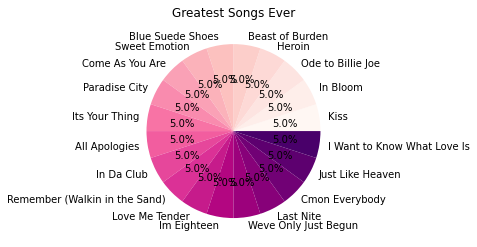

In [116]:
color = plt.cm.RdPu(np.linspace(0,1,20))
df["title"].value_counts().sort_values(ascending=True).head(20).plot.pie(y="artist",colors=color,autopct="%0.1f%%")
plt.title("Greatest Songs Ever")
plt.axis("off")
plt.show()

Similarly, the greatest artists:

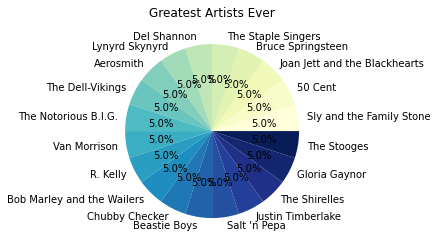

In [117]:
color = plt.cm.YlGnBu(np.linspace(0,1,20))
df["artist"].value_counts().sort_values(ascending=True).head(20).plot.pie(y="streak",colors=color,autopct="%0.1f%%")
plt.title("Greatest Artists Ever")
plt.axis("off")
plt.show()

Greatest writers:

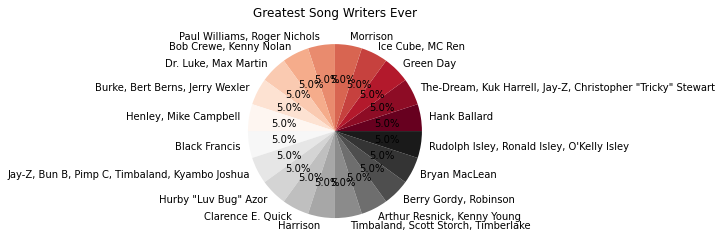

In [118]:
color = plt.cm.RdGy(np.linspace(0,1,20))
df["writers"].value_counts().sort_values(ascending=True).head(20).plot.pie(y="released",colors=color,autopct="%0.1f%%")
plt.title("Greatest Song Writers Ever")
plt.axis("off")
plt.show()

Greatest streaks in the dataset:

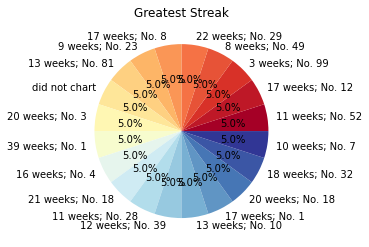

In [119]:
color = plt.cm.RdYlBu(np.linspace(0,1,20))
df["streak"].value_counts().sort_values(ascending=True).head(20).plot.pie(y="writer",colors=color,autopct="%0.1f%%")
plt.title("Greatest Streak")
plt.axis("off")
plt.show()

Greatest producers of all time:

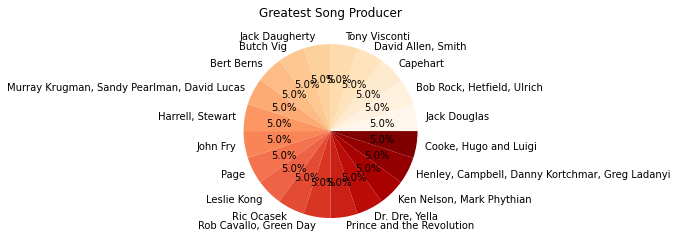

In [120]:
color = plt.cm.OrRd(np.linspace(0,1,20))
df["producer"].value_counts().sort_values(ascending=True).head(20).plot.pie(y="description",colors=color,autopct="%0.1f%%")
plt.title("Greatest Song Producer")
plt.axis("off")
plt.show()

By date released:

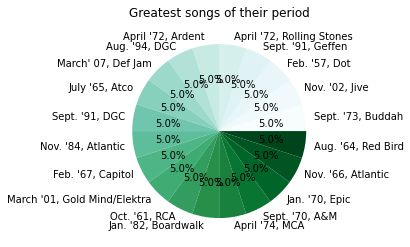

In [121]:
color = plt.cm.BuGn(np.linspace(0,1,20))
df["released"].value_counts().sort_values(ascending=True).head(20).plot.pie(y="title",colors=color,autopct="%0.1f%%")
plt.title("Greatest songs of their period")
plt.axis("off")
plt.show()

Now, I'll collect the data in '**title**', '**artist**', '**writers**' & '**producer**' variables/columns in separate boxes:

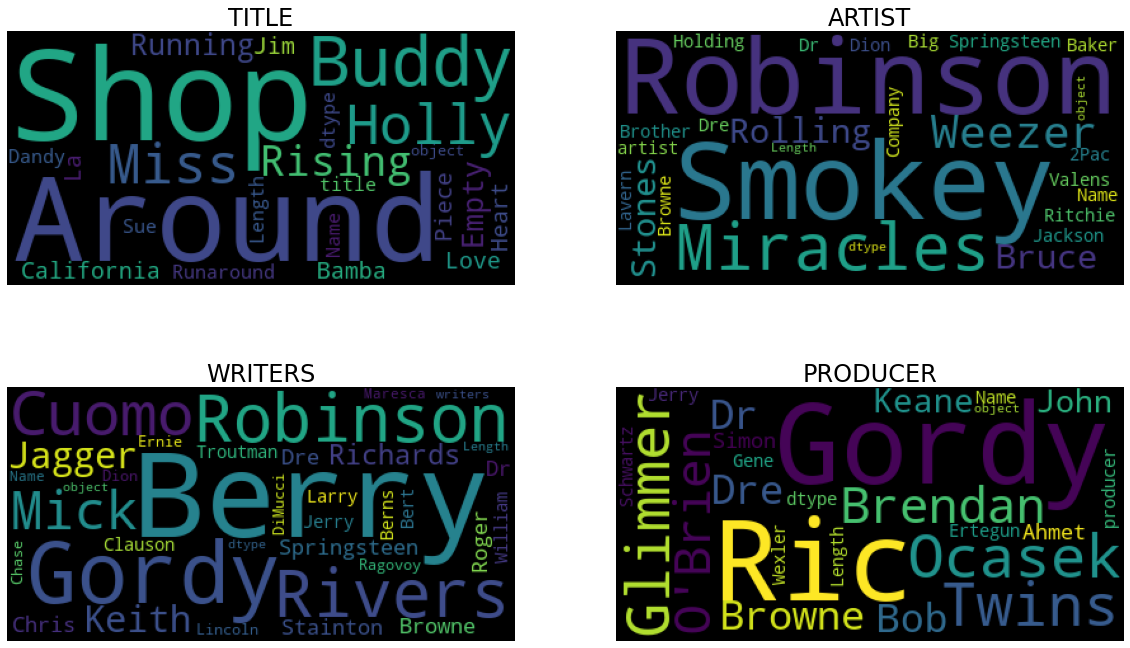

In [122]:
text_cols = ['title', 'artist', 'writers', 'producer']

from wordcloud import WordCloud, STOPWORDS

wc = WordCloud(stopwords = set(list(STOPWORDS) + ['|']), random_state = 42)
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(text_cols):
  op = wc.generate(str(df[c]))
  _ = axes[i].imshow(op)
  _ = axes[i].set_title(c.upper(), fontsize=24)
  _ = axes[i].axis('off')

This looks good! Now I'll see what words are **most common**** in the **artists**** list using WordCloud:

<Figure size 720x432 with 0 Axes>

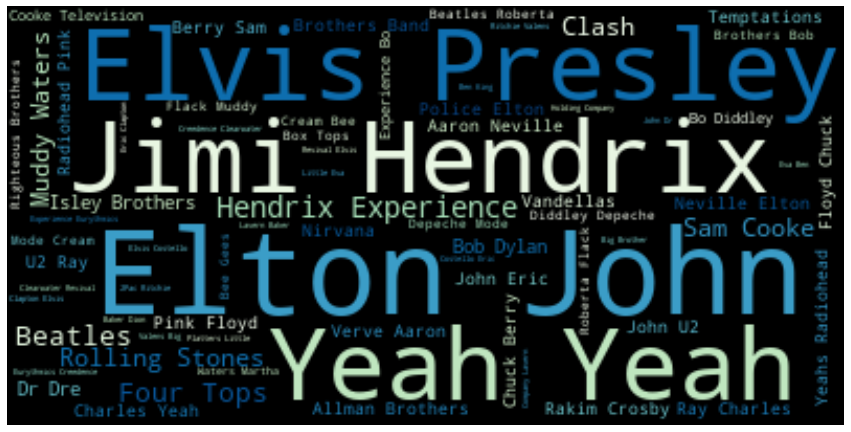

In [123]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in df.artist)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200,colormap='GnBu', background_color="black").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()

I want to check Elton John's popularity, through the charts:

In [124]:
elton = df[(df['artist']=='Elton John')].reset_index(drop=True)
elton.head(20)

,title,description,appears on,artist,writers,producer,released,streak
0,Tiny Dancer,Lyricist Taupin wrote this 1971 song about his...,Madman Across the Water (Island),Elton John,"John, Bernie Taupin",Gus Dudgeon,"Nov. '71, Uni",7 weeks; No. 41
1,Goodbye Yellow Brick Road,Inspired by the Rolling Stones' Goats Head Sou...,Goodbye Yellow Brick Road (Island),Elton John,"John, Bernie Taupin",Gus Dudgeon,"Sept. '73, MCA",17 weeks; No. 2
2,Candle in the Wind,Johnâs Marilyn Monroe tribute was a U.K. hit...,Goodbye Yellow Brick Road (Island),Elton John,"John, Bernie Taupin",Gus Dudgeon,"Oct. '73, MCA",Empty
3,Tiny Dancer,Lyricist Taupin wrote this 1971 song about his...,Madman Across the Water (Island),Elton John,"John, Bernie Taupin",Gus Dudgeon,"Nov. '71, Uni",7 weeks; No. 41
4,Goodbye Yellow Brick Road,Inspired by the Rolling Stones' Goats Head Sou...,Goodbye Yellow Brick Road (Island),Elton John,"John, Bernie Taupin",Gus Dudgeon,"Sept. '73, MCA",17 weeks; No. 2
5,Candle in the Wind,Johnâs Marilyn Monroe tribute was a U.K. hit...,Goodbye Yellow Brick Road (Island),Elton John,"John, Bernie Taupin",Gus Dudgeon,"Oct. '73, MCA",Empty
6,Tiny Dancer,Lyricist Taupin wrote this 1971 song about his...,Madman Across the Water (Island),Elton John,"John, Bernie Taupin",Gus Dudgeon,"Nov. '71, Uni",7 weeks; No. 41
7,Goodbye Yellow Brick Road,Inspired by the Rolling Stones' Goats Head Sou...,Goodbye Yellow Brick Road (Island),Elton John,"John, Bernie Taupin",Gus Dudgeon,"Sept. '73, MCA",17 weeks; No. 2
8,Candle in the Wind,Johnâs Marilyn Monroe tribute was a U.K. hit...,Goodbye Yellow Brick Road (Island),Elton John,"John, Bernie Taupin",Gus Dudgeon,"Oct. '73, MCA",Empty
9,Tiny Dancer,Lyricist Taupin wrote this 1971 song about his...,Madman Across the Water (Island),Elton John,"John, Bernie Taupin",Gus Dudgeon,"Nov. '71, Uni",7 weeks; No. 41


So Elton John came 17 times on the streak. Now I'd like to check Jimi Hendrix's popularity too:

In [131]:
jimi = df[(df['artist']=='The Jimi Hendrix Experience')].reset_index(drop=True)
jimi.head(20)

,title,description,appears on,artist,writers,producer,released,streak
0,The Wind Cries Mary,A dish-smashing argument with his girlfriend l...,Are You Experienced? (MCA),The Jimi Hendrix Experience,Hendrix,Chas Chandler,"May '67, Reprise",8 weeks; No. 65
1,Little Wing,Blissed out from his appearance at Monterey Po...,Axis: Bold as Love (Experience Hendrix/MCA),The Jimi Hendrix Experience,Hendrix,Chas Chandler,"Feb. '68, Reprise",Non-single
2,The Wind Cries Mary,A dish-smashing argument with his girlfriend l...,Are You Experienced? (MCA),The Jimi Hendrix Experience,Hendrix,Chas Chandler,"May '67, Reprise",8 weeks; No. 65
3,Little Wing,Blissed out from his appearance at Monterey Po...,Axis: Bold as Love (Experience Hendrix/MCA),The Jimi Hendrix Experience,Hendrix,Chas Chandler,"Feb. '68, Reprise",Non-single
4,The Wind Cries Mary,A dish-smashing argument with his girlfriend l...,Are You Experienced? (MCA),The Jimi Hendrix Experience,Hendrix,Chas Chandler,"May '67, Reprise",8 weeks; No. 65
5,Little Wing,Blissed out from his appearance at Monterey Po...,Axis: Bold as Love (Experience Hendrix/MCA),The Jimi Hendrix Experience,Hendrix,Chas Chandler,"Feb. '68, Reprise",Non-single
6,The Wind Cries Mary,A dish-smashing argument with his girlfriend l...,Are You Experienced? (MCA),The Jimi Hendrix Experience,Hendrix,Chas Chandler,"May '67, Reprise",8 weeks; No. 65
7,Little Wing,Blissed out from his appearance at Monterey Po...,Axis: Bold as Love (Experience Hendrix/MCA),The Jimi Hendrix Experience,Hendrix,Chas Chandler,"Feb. '68, Reprise",Non-single
8,The Wind Cries Mary,A dish-smashing argument with his girlfriend l...,Are You Experienced? (MCA),The Jimi Hendrix Experience,Hendrix,Chas Chandler,"May '67, Reprise",8 weeks; No. 65
9,Little Wing,Blissed out from his appearance at Monterey Po...,Axis: Bold as Love (Experience Hendrix/MCA),The Jimi Hendrix Experience,Hendrix,Chas Chandler,"Feb. '68, Reprise",Non-single


Finally, let me check Elvis Presley's popularity before moving forward:

In [126]:
elvis = df[(df['artist']=='Elvis Presley')].reset_index(drop=True)
elvis.head(20)

,title,description,appears on,artist,writers,producer,released,streak
0,Love Me Tender,"""Love Me Tender"" was the theme song from the f...",Elvis: 30 #1 Hits (RCA),Elvis Presley,"Presley, Vera Watson",Steve Sholes,"Oct. '56, RCA",23 weeks; No. 1
1,Blue Suede Shoes,The day after Presley made his television debu...,2nd to None (BMG Heritage),Elvis Presley,Carl Perkins,Steve Sholes,"March '56, RCA",12 weeks; No. 20
2,Cant Help Falling in Love,This adaptation of Giovanni Martini's 18th-cen...,Elvis 30 #1 Hits (RCA),Elvis Presley,"George Weiss, Hugo Peretti, Luigi Creatore",Joseph Lilley,"Oct. '61, RCA",14 weeks; No. 1
3,Love Me Tender,"""Love Me Tender"" was the theme song from the f...",Elvis: 30 #1 Hits (RCA),Elvis Presley,"Presley, Vera Watson",Steve Sholes,"Oct. '56, RCA",23 weeks; No. 1
4,Blue Suede Shoes,The day after Presley made his television debu...,2nd to None (BMG Heritage),Elvis Presley,Carl Perkins,Steve Sholes,"March '56, RCA",12 weeks; No. 20
5,Cant Help Falling in Love,This adaptation of Giovanni Martini's 18th-cen...,Elvis 30 #1 Hits (RCA),Elvis Presley,"George Weiss, Hugo Peretti, Luigi Creatore",Joseph Lilley,"Oct. '61, RCA",14 weeks; No. 1
6,All Shook Up,Songwriter Al Stanton walked up to Blackwell o...,Elvis 30 #1 Hits (RCA),Elvis Presley,"Otis Blackwell, Presley",Steve Sholes,"March '57, RCA",30 weeks; No. 1
7,All Shook Up,Songwriter Al Stanton walked up to Blackwell o...,Elvis 30 #1 Hits (RCA),Elvis Presley,"Otis Blackwell, Presley",Steve Sholes,"March '57, RCA",30 weeks; No. 1
8,All Shook Up,Songwriter Al Stanton walked up to Blackwell o...,Elvis 30 #1 Hits (RCA),Elvis Presley,"Otis Blackwell, Presley",Steve Sholes,"March '57, RCA",30 weeks; No. 1
9,All Shook Up,Songwriter Al Stanton walked up to Blackwell o...,Elvis 30 #1 Hits (RCA),Elvis Presley,"Otis Blackwell, Presley",Steve Sholes,"March '57, RCA",30 weeks; No. 1


Woah! Elvis was 11 times on the streak and not only that, he was 9 times No. 1 on the charts! He was/is truly the greatest!

Now let me check the "**most common
writers****" in the dataset:

<Figure size 720x432 with 0 Axes>

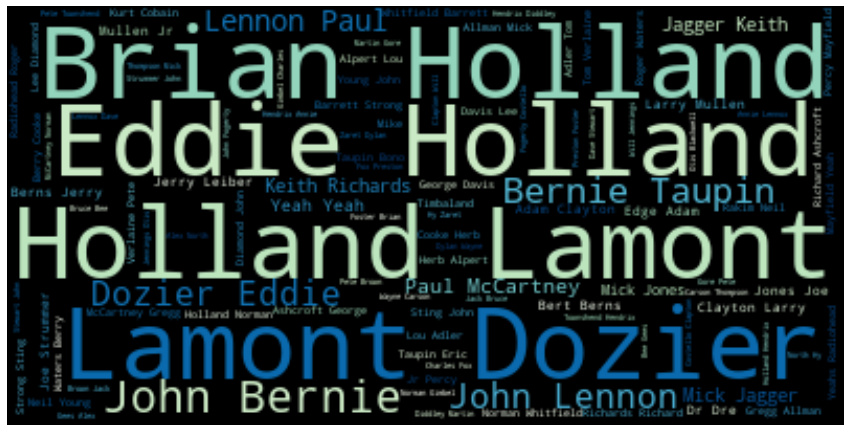

In [127]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in df.writers)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200,colormap='GnBu', background_color="black").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()

Likewise, the **most common artists**** on the list are:

<Figure size 720x432 with 0 Axes>

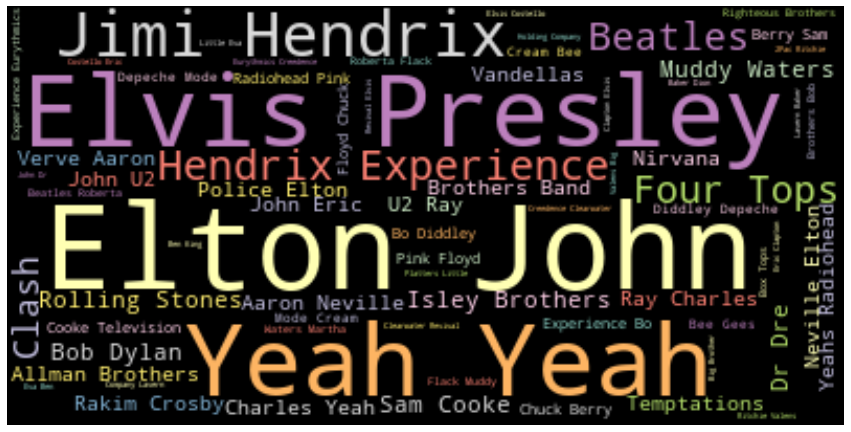

In [128]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in df.artist)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200,colormap='Set3', background_color="black").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()

Now I'll see when & where were the songs released:

<Figure size 720x432 with 0 Axes>

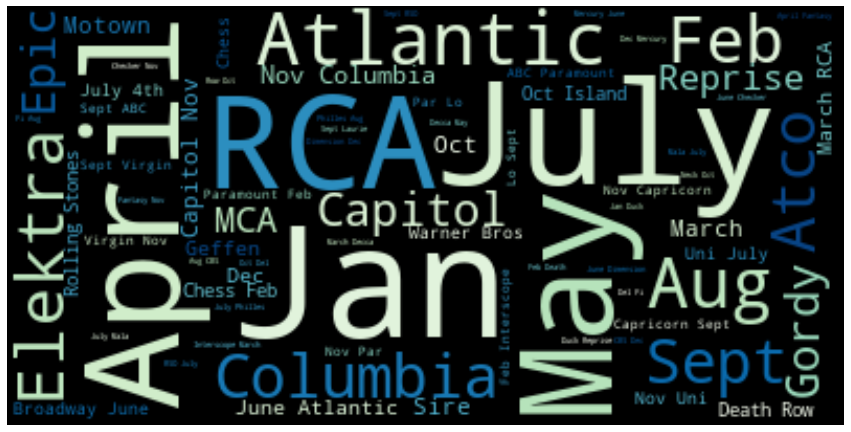

In [129]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in df.released)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200,colormap='GnBu', background_color="black").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()

Let me check the longest streak ever:

In [134]:
longest = df[(df['streak']=='30 weeks; No. 1')].reset_index(drop=True)
longest.head(10)

,title,description,appears on,artist,writers,producer,released,streak
0,In Da Club,50 Cent's rhyme skills caught the notice of Dr...,Get Rich or Die Tryin' (Interscope/Aftermath/S...,50 Cent,"50 Cent, Dr. Dre, Mike Elizondo","Dr. Dre, Elizondo","Dec. '02, Interscope/Aftermath/Shady",30 weeks; No. 1
1,In Da Club,50 Cent's rhyme skills caught the notice of Dr...,Get Rich or Die Tryin' (Interscope/Aftermath/S...,50 Cent,"50 Cent, Dr. Dre, Mike Elizondo","Dr. Dre, Elizondo","Dec. '02, Interscope/Aftermath/Shady",30 weeks; No. 1
2,All Shook Up,Songwriter Al Stanton walked up to Blackwell o...,Elvis 30 #1 Hits (RCA),Elvis Presley,"Otis Blackwell, Presley",Steve Sholes,"March '57, RCA",30 weeks; No. 1
3,All Shook Up,Songwriter Al Stanton walked up to Blackwell o...,Elvis 30 #1 Hits (RCA),Elvis Presley,"Otis Blackwell, Presley",Steve Sholes,"March '57, RCA",30 weeks; No. 1
4,All Shook Up,Songwriter Al Stanton walked up to Blackwell o...,Elvis 30 #1 Hits (RCA),Elvis Presley,"Otis Blackwell, Presley",Steve Sholes,"March '57, RCA",30 weeks; No. 1
5,All Shook Up,Songwriter Al Stanton walked up to Blackwell o...,Elvis 30 #1 Hits (RCA),Elvis Presley,"Otis Blackwell, Presley",Steve Sholes,"March '57, RCA",30 weeks; No. 1
6,All Shook Up,Songwriter Al Stanton walked up to Blackwell o...,Elvis 30 #1 Hits (RCA),Elvis Presley,"Otis Blackwell, Presley",Steve Sholes,"March '57, RCA",30 weeks; No. 1
7,All Shook Up,Songwriter Al Stanton walked up to Blackwell o...,Elvis 30 #1 Hits (RCA),Elvis Presley,"Otis Blackwell, Presley",Steve Sholes,"March '57, RCA",30 weeks; No. 1


Awesome! Dr Dre is my favorite producer :D

So All Shook Up by Elvis and In Da Club by 50 cent were loved for really long time. ( For 30 weeks these 2 songs remained Number 1). Now that's something!

So, as I've got a lot of interesting information from this dataset I think I should stop here now. Thank you for your time. Regards.
* Rachit Shukla